### 🚖 Análise de Viagens Uber
👩‍💻 **Autora:** Thaís Cristina dos Santos 

Este projeto tem como objetivo realizar uma **análise exploratória** dos dados de viagens Uber, buscando identificar:

- Horários de maior movimento.
- Dias e faixas horárias com maior demanda.
- Rotas mais populares.
- Variação de preços ao longo do tempo.

A análise segue as seguintes etapas:

1. **Importação e inspeção dos dados** – entender a estrutura do dataset.
2. **Limpeza e preparação** – criar variáveis úteis para análise.
3. **Análise exploratória (EDA)** – gerar tabelas, gráficos e estatísticas.
4. **Insights e conclusões** – destacar os principais achados.


In [1]:
# Bibliotecas Principais
import pandas as pd
import os
from pathlib import Path
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

### 🗂️ 1. Carregamento e Inspeção dos Dados
Nesta etapa, vamos carregar o dataset e observar sua estrutura inicial.


In [2]:
# Carregamento do Dataset
uber_data = Path("data") / "uber_fortaleza.csv"
uber_data = pd.read_csv(uber_data)
print("Arquivo Carregado", uber_data)

# Estrutura do Dataset
print(uber_data.info())
print(uber_data.head())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
display(uber_data.describe(include="all"))

Arquivo Carregado        Unnamed: 0                    Origem             Destino           Dia  \
0               0           Dionísio Torres             Aldeota  Quinta-Feira   
1               1                  Meireles          Guararapes  Quarta-Feira   
2               2                Cajazeiras           Messejana       Domingo   
3               3  Parque Presidente Vargas  Conjunto Palmeiras   Sexta-Feira   
4               4                Cajazeiras          Guararapes        Sábado   
...           ...                       ...                 ...           ...   
99995       99995              Autran Nunes        Autran Nunes       Domingo   
99996       99996                 Messejana  Conjunto Palmeiras       Domingo   
99997       99997                   Aldeota        Canindezinho        Sábado   
99998       99998        Parque Dois Irmaos          Guararapes  Quarta-Feira   
99999       99999                Cajazeiras               Dende   Terça-Feira   

       Ho

,Unnamed: 0,Origem,Destino,Dia,Hora,Preço
count,100000.000000,100000,100000,100000,100000.000000,100000.000000
unique,NaN,15,15,7,NaN,NaN
top,NaN,Parque Presidente Vargas,Conjunto Palmeiras,Domingo,NaN,NaN
freq,NaN,6787,16081,16860,NaN,NaN
mean,49999.500000,NaN,NaN,NaN,13.614420,15.414671
std,28867.657797,NaN,NaN,NaN,6.113448,6.428993
min,0.000000,NaN,NaN,NaN,0.000000,3.460000
25%,24999.750000,NaN,NaN,NaN,9.000000,11.200000
50%,49999.500000,NaN,NaN,NaN,13.000000,15.090000
75%,74999.250000,NaN,NaN,NaN,19.000000,18.260000


### 🧹2. Limpeza e Preparação de Dados
Nesta etapa, vamos preparar o dataset para análise:
- Conferir e tratar valores nulos.
- Padronizar os nomes dos dias da semana.
- Criar novas variáveis úteis:
  - **Faixa horária** (Manhã, Tarde, Noite, Madrugada).
  - **Fim de semana**.

In [3]:
import re
import numpy as np
import pandas as pd

def parse_hour_simple(x):
    if pd.isna(x):
        return np.nan
    # se já for número
    if isinstance(x, (int, float, np.integer, np.floating)):
        x_int = int(x)
        return x_int if 0 <= x_int < 24 else np.nan

    s = str(x).strip()

    # formato "13:00" ou "13:00:00" -> usar pandas
    if ":" in s:
        dt = pd.to_datetime(s, errors="coerce")
        return int(dt.hour) if not pd.isna(dt) else np.nan

    # formato "13h" ou "13h30" -> transformar em "13:30"
    if re.search(r"\dh", s, flags=re.IGNORECASE):
        s2 = re.sub(r"(\d{1,2})h(\d{1,2})?", lambda m: f"{m.group(1)}:{m.group(2) or '00'}", s, flags=re.IGNORECASE)
        dt = pd.to_datetime(s2, errors="coerce")
        return int(dt.hour) if not pd.isna(dt) else np.nan

    # se for só dígitos "13" ou "7"
    if re.fullmatch(r"\d{1,2}", s):
        h = int(s)
        return h if 0 <= h < 24 else np.nan

    # não conseguiu interpretar
    return np.nan

# Aplicar ao seu dataframe (troque 'uber_data' se seu df tiver outro nome)
uber_data["Hora_parsed"] = uber_data["Hora"].apply(parse_hour_simple)

# Substituir/atualizar a coluna Hora com Int64 para permitir NA
uber_data["Hora"] = uber_data["Hora_parsed"].astype("Int64")

# Criar Faixa_Horaria
def faixa_horaria(h):
    if pd.isna(h):
        return np.nan
    h = int(h)
    if 5 <= h < 12:
        return "Manhã"
    elif 12 <= h < 18:
        return "Tarde"
    elif 18 <= h < 24:
        return "Noite"
    else:
        return "Madrugada"

uber_data["Faixa_Horaria"] = uber_data["Hora"].apply(faixa_horaria)

# Verificação rápida
print("Não convertidos:", uber_data["Hora_parsed"].isna().sum(), "de", len(uber_data))
uber_data[["Hora", "Hora_parsed", "Faixa_Horaria"]].head(12)

Não convertidos: 3719 de 100000


,Hora,Hora_parsed,Faixa_Horaria
0,13,13.0,Tarde
1,12,12.0,Tarde
2,5,5.0,Manhã
3,16,16.0,Tarde
4,20,20.0,Noite
5,<NA>,NaN,NaN
6,14,14.0,Tarde
7,11,11.0,Manhã
8,16,16.0,Tarde
9,21,21.0,Noite


In [7]:
import re
import pandas as pd

# copiar a coluna original para trabalhar em string
s = uber_data["Hora"].astype(str).str.strip()

# 1) Casos simples: "13" -> "13:00"
mask_digits = s.str.fullmatch(r'\d{1,2}')
s = s.where(~mask_digits, s + ':00')

# 2) Casos "1300" ou "0130" -> "13:00" / "01:30"
mask_hhmm_compact = s.str.fullmatch(r'\d{3,4}')
s = s.where(~mask_hhmm_compact, s.str.replace(r'^(\d{1,2})(\d{2})$', r'\1:\2', regex=True))

# 3) Se houver separadores diferentes (ex: "13h30" -> "13:30")
s = s.str.replace(r'[hH]', ':', regex=True)

# 4) Tentar parse com formato esperado HH:MM (rápido e determinístico)
hora_parsed = pd.to_datetime(s, format="%H:%M", errors='coerce').dt.hour

# 5) Fallback: tentar parse genérico (inferencia) para capturar formatos como "13:00:00" ou ISO
hora_parsed = hora_parsed.fillna(pd.to_datetime(s, errors='coerce').dt.hour)

# 6) Se ainda houver valores faltando, marcar e exibir quais são
faltantes = s[hora_parsed.isna()].unique()
if len(faltantes) > 0:
    print(f"Valores de 'Hora' que não foram parseados ({len(faltantes)} exemplos):", faltantes[:10])

# 7) Atribuir de volta ao dataframe como inteiro anulável
uber_data["Hora"] = hora_parsed.astype("Int64")  # Int64 permite NaN

# 8) Criar faixa horária (ajuste os intervalos se preferir)
def faixa_horaria(h):
    if pd.isna(h):
        return "Desconhecido"
    h = int(h)
    if 5 <= h < 12:
        return "Manhã"
    if 12 <= h < 18:
        return "Tarde"
    if 18 <= h < 23:
        return "Noite"
    return "Madrugada"

uber_data["Faixa_Horaria"] = uber_data["Hora"].apply(faixa_horaria)

# 9) Resumo final
print("Conversão concluída. Valores válidos (0-23):", uber_data["Hora"].dropna().unique()[:10])
print("Total linhas:", len(uber_data), "— com Hora válida:", uber_data["Hora"].notna().sum(), "— faltantes:", uber_data["Hora"].isna().sum())


Valores de 'Hora' que não foram parseados (1 exemplos): ['<NA>']
Conversão concluída. Valores válidos (0-23): <IntegerArray>
[13, 12, 5, 16, 20, 14, 11, 21, 4, 18]
Length: 10, dtype: Int64
Total linhas: 100000 — com Hora válida: 96281 — faltantes: 3719


C:\Users\Home\AppData\Local\Temp\ipykernel_5248\3358224919.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hora_parsed = hora_parsed.fillna(pd.to_datetime(s, errors='coerce').dt.hour)


In [6]:
# Conferir valores nulos
print("Valores nulos por coluna:")
print(uber_data.isnull().sum())

# 2. Padronizar os nomes dos dias da semana
mapa_dias = {
    "Segunda-Feira": "Monday",
    "Terça-Feira": "Tuesday",
    "Quarta-Feira": "Wednesday",
    "Quinta-Feira": "Thursday",
    "Sexta-Feira": "Friday",
    "Sábado": "Saturday",
    "Domingo": "Sunday"
}

uber_data["Dia_da_Semana"] = uber_data["Dia"].map(mapa_dias)

# Criar coluna fim de semana
uber_data["Fim_de_Semana"] = uber_data["Dia_da_Semana"].isin(["Saturday", "Sunday"])

# Conferindo resultado
uber_data.head()


Valores nulos por coluna:
Unnamed: 0          0
Origem              0
Destino             0
Dia                 0
Hora             3719
Preço               0
Hora_parsed      3719
Faixa_Horaria       0
Dia_da_Semana       0
dtype: int64


,Unnamed: 0,Origem,Destino,Dia,Hora,Preço,Hora_parsed,Faixa_Horaria,Dia_da_Semana,Fim_de_Semana
0,0,Dionísio Torres,Aldeota,Quinta-Feira,13,11.18,13.0,Tarde,Thursday,False
1,1,Meireles,Guararapes,Quarta-Feira,12,13.90,12.0,Tarde,Wednesday,False
2,2,Cajazeiras,Messejana,Domingo,5,13.78,5.0,Manhã,Sunday,True
3,3,Parque Presidente Vargas,Conjunto Palmeiras,Sexta-Feira,16,19.27,16.0,Tarde,Friday,False
4,4,Cajazeiras,Guararapes,Sábado,20,14.08,20.0,Noite,Saturday,True


In [ ]:
# Conferindo como ficou o dataset
uber_data.head()

,Unnamed: 0,Origem,Destino,Dia,Hora,Preço
0,0,Dionísio Torres,Aldeota,Quinta-Feira,13.0,11.18
1,1,Meireles,Guararapes,Quarta-Feira,12.0,13.90
2,2,Cajazeiras,Messejana,Domingo,5.0,13.78
3,3,Parque Presidente Vargas,Conjunto Palmeiras,Sexta-Feira,16.0,19.27
4,4,Cajazeiras,Guararapes,Sábado,20.0,14.08


### 🔍3. Análise Exploratória
#### 3.1 Distribuição de Viagens por Dia da Semana
Aqui vamos analisar em quais dias da semana acontecem mais viagens.


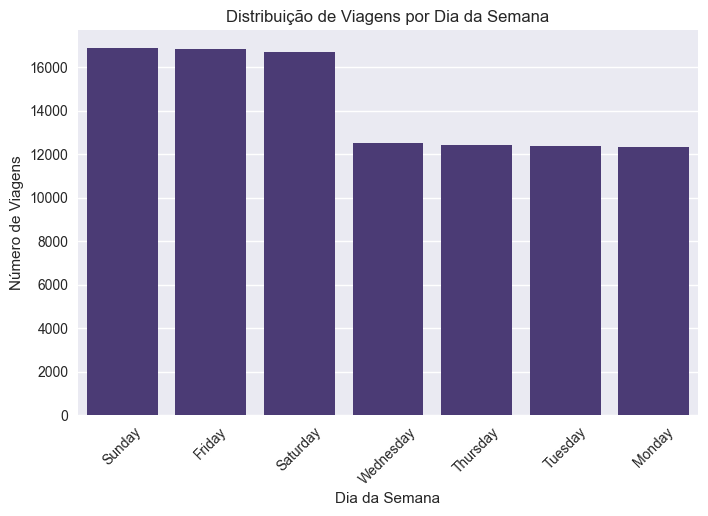

In [ ]:
# Contagem de viagens por dia da semana
viagens_dia_semana = uber_data["Dia_da_Semana"].value_counts()

# Plotando
plt.figure(figsize=(8,5))
sns.barplot(x=viagens_dia_semana.index, y=viagens_dia_semana.values)
plt.title("Distribuição de Viagens por Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Número de Viagens")
plt.xticks(rotation=45)
plt.show()


#### 3.2 Distribuição de Viagens por Faixa Horária
Agora vamos verificar em quais períodos do dia há mais demanda de viagens.


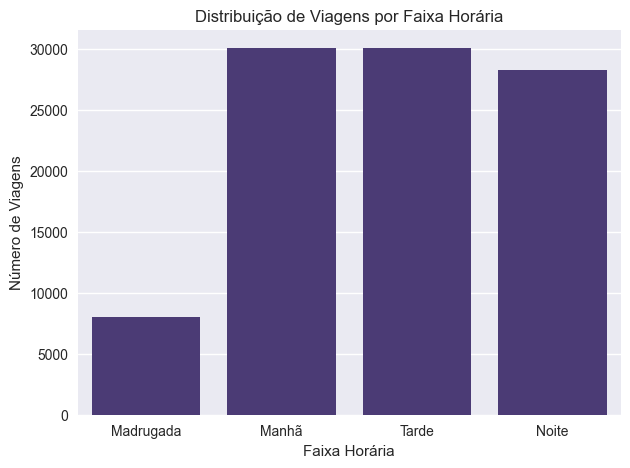

In [ ]:
# Contagem por faixa horária
viagens_faixa = uber_data["Faixa_Horaria"].value_counts()

# Plotando
plt.figure(figsize=(7,5))
sns.barplot(x=viagens_faixa.index, y=viagens_faixa.values, order=["Madrugada","Manhã","Tarde","Noite"])
plt.title("Distribuição de Viagens por Faixa Horária")
plt.xlabel("Faixa Horária")
plt.ylabel("Número de Viagens")
plt.show()


#### 3.3 Preço Médio por Faixa Horária
Além da quantidade de viagens, vamos analisar como o preço varia conforme a faixa horária.


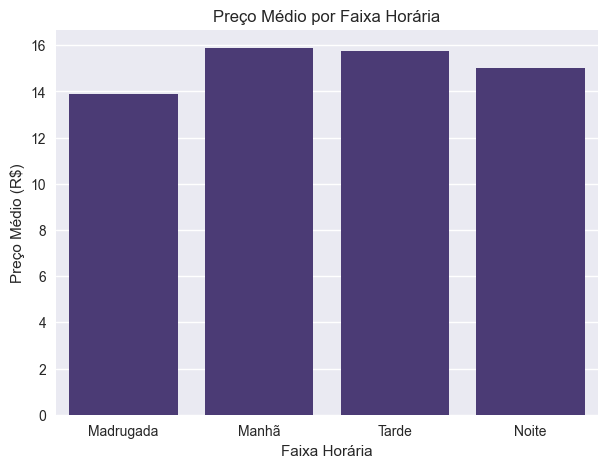

In [ ]:
# Preço médio por faixa horária
preco_medio_faixa = uber_data.groupby("Faixa_Horaria")["Preço"].mean().reset_index()

# Plotando
plt.figure(figsize=(7,5))
sns.barplot(data=preco_medio_faixa, x="Faixa_Horaria", y="Preço", order=["Madrugada","Manhã","Tarde","Noite"])
plt.title("Preço Médio por Faixa Horária")
plt.xlabel("Faixa Horária")
plt.ylabel("Preço Médio (R$)")
plt.show()


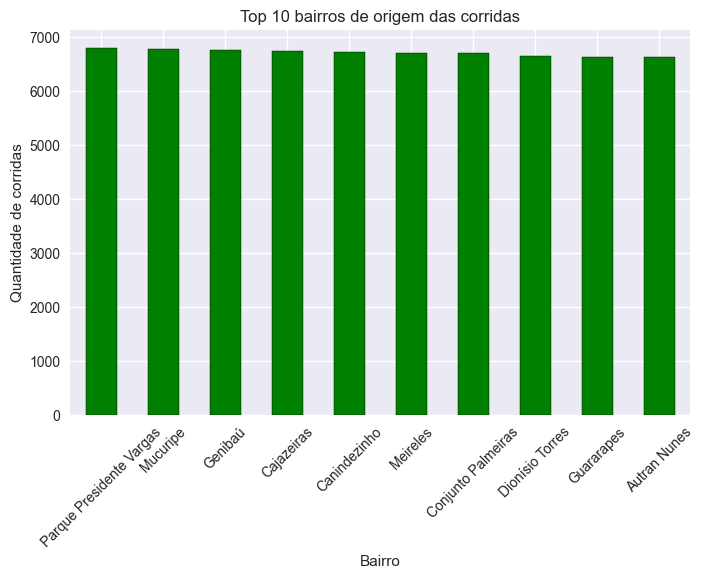

In [ ]:
# Top 10 origens mais frequentes
plt.figure(figsize=(8,5))
uber_data["Origem"].value_counts().head(10).plot(kind="bar", color="green", edgecolor="black")
plt.title("Top 10 bairros de origem das corridas")
plt.xlabel("Bairro")
plt.ylabel("Quantidade de corridas")
plt.xticks(rotation=45)
plt.show()

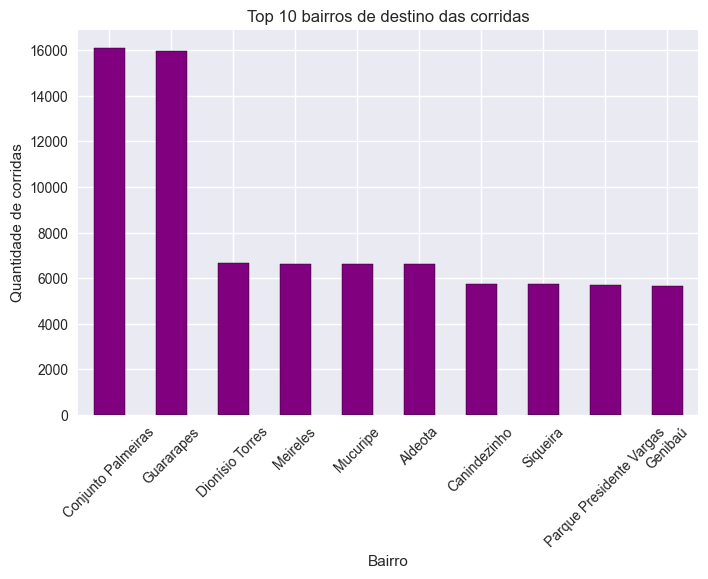

In [ ]:
# Top 10 destinos mais frequentes
plt.figure(figsize=(8,5))
uber_data["Destino"].value_counts().head(10).plot(kind="bar", color="purple", edgecolor="black")
plt.title("Top 10 bairros de destino das corridas")
plt.xlabel("Bairro")
plt.ylabel("Quantidade de corridas")
plt.xticks(rotation=45)
plt.show()

### ⚙️ 4. Engenharia de Features

Nesta etapa criamos variáveis derivadas que enriquecem a análise e podem ser úteis para modelagem:
- `Rota` (Origem + Destino)
- `Fim_de_Semana` (0/1)
- `Popularidade_Rota` (contagem de viagens por rota)
- `Desequilibrio_Origem` / `Desequilibrio_Destino` (diferença entre frequência de origem e destino)
- `Faixa_Preco` (categorias de preço)
- `Is_Peak` (flag de horário de pico)
- `Preco_medio_por_rota` (feature agregada)


In [ ]:
# Engenharia de Features

cols = uber_data.columns.tolist()

# 4.1 Rota: Origem - Destino
if ("Origem" in cols) and ("Destino" in cols):
    uber_data["Rota"] = uber_data["Origem"].astype(str) + " - " + uber_data["Destino"].astype(str)
else:
    print("Aviso: 'Origem' ou 'Destino' não encontrada(s). Pulei criação de 'Rota'.")

# 4.2 Fim_de_Semana: tratar nomes dia em PT/EN e converter pra 0/1
if "Dia_da_Semana" in cols:
    # Suporta valores em Português e Inglês
    dias_sabado_domingo = {"Sábado","Domingo","Saturday","Sunday"}
    uber_data["Fim_de_Semana"] = uber_data["Dia_da_Semana"].apply(lambda x: 1 if x in dias_sabado_domingo else 0)
else:
    print("Aviso: 'Dia_da_Semana' não encontrada. Pulei criação de 'Fim_de_Semana'.")

# 4.3 Popularidade da rota (contagem)
if "Rota" in uber_data.columns:
    counts_rota = uber_data["Rota"].value_counts()
    uber_data["Popularidade_Rota"] = uber_data["Rota"].map(counts_rota).fillna(0).astype(int)
else:
    print("Aviso: 'Rota' não existe; pulei 'Popularidade_Rota'.")

# 4.4 Desequilíbrio de Origem / Destino
# Desequilíbrio_Origem = (n_corridas_como_origem) - (n_corridas_como_destino)
if ("Origem" in cols) and ("Destino" in cols):
    origem_counts = uber_data["Origem"].value_counts()
    destino_counts = uber_data["Destino"].value_counts()
    uber_data["Desequilibrio_Origem"] = uber_data["Origem"].map(origem_counts).fillna(0) - uber_data["Origem"].map(destino_counts).fillna(0)
    uber_data["Desequilibrio_Destino"] = -uber_data["Desequilibrio_Origem"]
else:
    print("Aviso: não foi possível criar desequilíbrios (faltam 'Origem' ou 'Destino').")

# 4.5 Faixa de preço (exemplo: ajustar thresholds conforme seu dataset)
if "Preço" in cols:
    # garantir float
    uber_data["Preço"] = pd.to_numeric(uber_data["Preço"], errors="coerce")

    def faixa_preco(p):
        if pd.isna(p):
            return np.nan
        if p < 20:
            return "Baixo"
        elif p <= 50:
            return "Médio"
        else:
            return "Alto"

    uber_data["Faixa_Preço"] = uber_data["Preço"].apply(faixa_preco)
else:
    print("Aviso: coluna 'Preço' não encontrada; pulei 'Faixa_Preço'.")

# 4.6 Flag de horário de pico (ex.: manhã 7-9 e noite 17-19) - depende de coluna 'Hora' existente
if "Hora" in cols:
    # Garantir que a coluna esteja em int (0–23)
    try:
        uber_data["Hora"] = pd.to_numeric(uber_data["Hora"], errors="coerce").astype(int)
    except Exception:
        print("Aviso: não consegui converter 'Hora' para int.")

    def is_peak(h):
        if pd.isna(h):
            return 0
        return 1 if (7 <= h <= 9) or (17 <= h <= 19) else 0

    uber_data["Is_Peak"] = uber_data["Hora"].apply(is_peak)
else:
    print("Aviso: 'Hora' não encontrada. Pulei 'Is_Peak'.")

# 4.7 Preço médio por rota (feature agregada)
if "Rota" in uber_data.columns and "Preço" in uber_data.columns:
    preco_medio_rota = uber_data.groupby("Rota")["Preço"].transform("mean")
    uber_data["Preco_medio_por_rota"] = preco_medio_rota
else:
    print("Aviso: não foi possível criar 'Preco_medio_por_rota' (falta 'Rota' ou 'Preço').")

# 4.8 Normalizações / transformações numéricas rápidas (ex.: log do preço)
if "Preço" in cols:
    # evitar -ve / zero: só transformar preços > 0
    uber_data["Preço_log1p"] = uber_data["Preço"].apply(lambda x: np.log1p(x) if pd.notna(x) and x >= 0 else np.nan)

# Exibir resumo das novas features
features_criadas = [c for c in ["Rota","Fim_de_Semana","Popularidade_Rota","Desequilibrio_Origem",
                                "Desequilibrio_Destino","Faixa_Preço","Is_Peak","Preco_medio_por_rota","Preço_log1p"] if c in uber_data.columns]

print("Features criadas/atuais:", features_criadas)
display(uber_data[features_criadas].head(10))

# Estatísticas rápidas para inspeção
if "Popularidade_Rota" in uber_data.columns:
    print("\nTop 10 rotas por contagem:")
    display(uber_data.groupby("Rota")["Popularidade_Rota"].first().sort_values(ascending=False).head(10))

if "Faixa_Preço" in uber_data.columns:
    print("\nDistribuição de Faixa_Preço:")
    display(uber_data["Faixa_Preço"].value_counts(dropna=False))


Aviso: não consegui converter 'Hora' para int.
Features criadas/atuais: ['Rota', 'Fim_de_Semana', 'Popularidade_Rota', 'Desequilibrio_Origem', 'Desequilibrio_Destino', 'Faixa_Preço', 'Is_Peak', 'Preco_medio_por_rota', 'Preço_log1p']


,Rota,Fim_de_Semana,Popularidade_Rota,Desequilibrio_Origem,Desequilibrio_Destino,Faixa_Preço,Is_Peak,Preco_medio_por_rota,Preço_log1p
0,Dionísio Torres - Aldeota,0,777,-14,14,Baixo,0,9.199846,2.499795
1,Meireles - Guararapes,0,1055,67,-67,Baixo,0,13.200256,2.701361
2,Cajazeiras - Messejana,1,670,3054,-3054,Baixo,0,14.376955,2.693275
3,Parque Presidente Vargas - Conjunto Palmeiras,0,1070,1088,-1088,Baixo,0,17.430607,3.009142
4,Cajazeiras - Guararapes,1,1097,3054,-3054,Baixo,0,15.659307,2.713369
5,Parque Presidente Vargas - Conjunto Palmeiras,1,1070,1088,-1088,Baixo,0,17.430607,2.821379
6,Guararapes - Dionísio Torres,0,799,-9336,9336,Baixo,0,13.203705,2.561868
7,Guararapes - Genibaú,1,253,-9336,9336,Baixo,0,17.398300,2.817204
8,Aldeota - Dionísio Torres,1,765,-19,19,Baixo,0,9.193111,2.286456
9,Canindezinho - Guararapes,0,1042,966,-966,Baixo,0,17.330921,2.966303



Top 10 rotas por contagem:


Rota
Dionísio Torres - Guararapes         1149
Aldeota - Conjunto Palmeiras         1122
Mucuripe - Conjunto Palmeiras        1103
Guararapes - Conjunto Palmeiras      1102
Cajazeiras - Guararapes              1097
Meireles - Conjunto Palmeiras        1096
Cajazeiras - Conjunto Palmeiras      1096
Canindezinho - Conjunto Palmeiras    1095
Autran Nunes - Conjunto Palmeiras    1090
Siqueira - Guararapes                1089
Name: Popularidade_Rota, dtype: int64


Distribuição de Faixa_Preço:


Faixa_Preço
Baixo    82205
Médio    17795
Name: count, dtype: int64

#### 🔧 4. Pré-processamento dos dados

Nesta etapa, realizamos:
- Separação entre variáveis preditoras (`X`) e variável alvo (`y`)
- Divisão do conjunto em dados de treino e teste
- Padronização das variáveis com `StandardScaler`

A padronização é importante porque muitos algoritmos de ML são sensíveis à escala das variáveis.

In [ ]:
# Pré-processamento para modelagem 
# Dependências: scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import joblib
import numpy as np
import pandas as pd

# Nome do dataframe e target (ajuste se for diferente)
df = uber_data
TARGET = "Preço"

# 1) Verifica se target existe
if TARGET not in df.columns:
    raise ValueError(f"Coluna alvo '{TARGET}' não encontrada no dataframe. Ajuste TARGET para a coluna desejada.")

# 2) Listas de features candidatas (serão filtradas pelas colunas reais do df)
candidate_categorical = ["Faixa_Horaria", "Faixa_Preço", "Rota", "Dia_da_Semana"]
candidate_numeric = ["Popularidade_Rota", "Desequilibrio_Origem", "Desequilibrio_Destino",
                     "Hora", "Preco_medio_por_rota", "Preço_log1p"]

# Filtrar apenas as colunas que existem no dataset
categorical_features = [c for c in candidate_categorical if c in df.columns]
numeric_features = [c for c in candidate_numeric if c in df.columns]

print("Features categóricas usadas:", categorical_features)
print("Features numéricas usadas:", numeric_features)

# 3) Separar X e y (removendo linhas com target missing)
data = df.copy()
data = data.loc[data[TARGET].notna()].reset_index(drop=True)
X = data[categorical_features + numeric_features].copy()
y = data[TARGET].copy()

# 4) Pipelines para numéricas e categóricas
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),   # preencher NaNs numéricos com mediana
    ("scaler", StandardScaler()),                    # padronizar
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="__missing__")),  # preencher NaNs
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),    # one-hot
])

# 5) ColumnTransformer combinando
transformers = []
if numeric_features:
    transformers.append(("num", numeric_pipeline, numeric_features))
if categorical_features:
    transformers.append(("cat", categorical_pipeline, categorical_features))

if not transformers:
    raise ValueError("Nenhuma feature disponível para pré-processamento. Cheque as colunas do dataset.")

preprocessor = ColumnTransformer(transformers=transformers, remainder="drop", verbose_feature_names_out=False)

# 6) Pipeline completo (só pré-processador — depois você pode encadear um estimador)
preprocessing_pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

# 7) Split treino / teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8) Ajustar (fit) apenas no treino
preprocessing_pipeline.fit(X_train)

# 9) Transformar conjuntos (opcional: para inspeção)
X_train_trans = preprocessing_pipeline.transform(X_train)
X_test_trans = preprocessing_pipeline.transform(X_test)

print(f"Shape X_train original: {X_train.shape} -> transformado: {X_train_trans.shape}")
print(f"Shape X_test  original: {X_test.shape}  -> transformado: {X_test_trans.shape}")

# 10) Obter nomes das features processadas (útil para interpretar modelos)
# Nota: get_feature_names_out está disponível no ColumnTransformer / OneHotEncoder recentes
try:
    feature_names = preprocessing_pipeline.named_steps["preprocessor"].get_feature_names_out()
    print("Número de features após pré-processamento:", len(feature_names))
    print("Primeiras 40 features (se houver):", feature_names[:40])
except Exception as e:
    print("Não foi possível obter nomes das features transformadas automaticamente:", e)
    feature_names = None

# 11) Salvar pipeline de pré-processamento para uso posterior
joblib.dump(preprocessing_pipeline, "preprocessing_pipeline.joblib")
print("Pipeline de pré-processamento salvo em 'preprocessing_pipeline.joblib'")

# Variáveis de saída úteis no notebook
preprocessing_result = {
    "pipeline": preprocessing_pipeline,
    "X_train_trans": X_train_trans,
    "X_test_trans": X_test_trans,
    "y_train": y_train,
    "y_test": y_test,
    "feature_names": feature_names
}


Features categóricas usadas: ['Faixa_Horaria', 'Faixa_Preço', 'Rota', 'Dia_da_Semana']
Features numéricas usadas: ['Popularidade_Rota', 'Desequilibrio_Origem', 'Desequilibrio_Destino', 'Hora', 'Preco_medio_por_rota', 'Preço_log1p']
Shape X_train original: (80000, 10) -> transformado: (80000, 245)
Shape X_test  original: (20000, 10)  -> transformado: (20000, 245)
Número de features após pré-processamento: 245
Primeiras 40 features (se houver): ['Popularidade_Rota' 'Desequilibrio_Origem' 'Desequilibrio_Destino' 'Hora'
 'Preco_medio_por_rota' 'Preço_log1p' 'Faixa_Horaria_Madrugada'
 'Faixa_Horaria_Manhã' 'Faixa_Horaria_Noite' 'Faixa_Horaria_Tarde'
 'Faixa_Horaria___missing__' 'Faixa_Preço_Baixo' 'Faixa_Preço_Médio'
 'Rota_Aldeota - Aldeota' 'Rota_Aldeota - Autran Nunes'
 'Rota_Aldeota - Cajazeiras' 'Rota_Aldeota - Canindezinho'
 'Rota_Aldeota - Conjunto Palmeiras' 'Rota_Aldeota - Dende'
 'Rota_Aldeota - Dionísio Torres' 'Rota_Aldeota - Genibaú'
 'Rota_Aldeota - Guararapes' 'Rota_Aldeota -

In [ ]:
# Bloco de verificação e reparo de features faltantes
import pandas as pd
import numpy as np

# 0) checar uber_data
try:
    uber_data
except NameError:
    raise NameError("A variável 'uber_data' não está definida. Rode as células de carregamento/limpeza primeiro.")

print("Colunas atuais:", list(uber_data.columns))

# 1) Criar 'Rota' se possível e se estiver faltando
if "Rota" not in uber_data.columns:
    if ("Origem" in uber_data.columns) and ("Destino" in uber_data.columns):
        uber_data["Rota"] = uber_data["Origem"].astype(str) + " - " + uber_data["Destino"].astype(str)
        print("Criei coluna 'Rota' a partir de 'Origem' e 'Destino'.")
    else:
        print("Não foi possível criar 'Rota' (faltam 'Origem' ou 'Destino').")

# 2) Criar 'Popularidade_Rota' se estiver faltando e se 'Rota' existir
if "Popularidade_Rota" not in uber_data.columns:
    if "Rota" in uber_data.columns:
        counts = uber_data["Rota"].value_counts()
        uber_data["Popularidade_Rota"] = uber_data["Rota"].map(counts).fillna(0).astype(int)
        print("Criei 'Popularidade_Rota'.")
    else:
        print("'Popularidade_Rota' ausente e não foi possível criá-la (falta 'Rota').")

# 3) Criar 'Desequilibrio_Origem' / 'Desequilibrio_Destino' se faltarem
if ("Desequilibrio_Origem" not in uber_data.columns) and ("Origem" in uber_data.columns):
    origem_counts = uber_data["Origem"].value_counts()
    destino_counts = uber_data["Destino"].value_counts() if "Destino" in uber_data.columns else pd.Series(dtype=int)
    uber_data["Desequilibrio_Origem"] = uber_data["Origem"].map(origem_counts).fillna(0) - uber_data["Origem"].map(destino_counts).fillna(0)
    uber_data["Desequilibrio_Destino"] = -uber_data["Desequilibrio_Origem"]
    print("Criei 'Desequilibrio_Origem' e 'Desequilibrio_Destino'.")

# 4) Criar 'Faixa_Preço' se faltar e se 'Preço' existir
if "Faixa_Preço" not in uber_data.columns and "Preço" in uber_data.columns:
    def faixa_preco(p):
        try:
            if pd.isna(p): return np.nan
            p = float(p)
            if p < 20: return "Baixo"
            elif p <= 50: return "Médio"
            else: return "Alto"
        except:
            return np.nan
    uber_data["Faixa_Preço"] = uber_data["Preço"].apply(faixa_preco)
    print("Criei 'Faixa_Preço' a partir de 'Preço'.")

# 5) Conferir Hora como numérico (0-23)
if "Hora" in uber_data.columns:
    uber_data["Hora"] = pd.to_numeric(uber_data["Hora"], errors="coerce")
    # opcional: converter floats inteiros para int onde não há NA
    # uber_data["Hora"] = uber_data["Hora"].astype("Int64")

# Mostrar resumo final das colunas relevantes
relevantes = ["Rota","Popularidade_Rota","Desequilibrio_Origem","Desequilibrio_Destino","Faixa_Preço","Hora","Preço"]
print("\nResumo das colunas relevantes (existentes):")
for c in relevantes:
    print(c, "->", ("OK" if c in uber_data.columns else "FALTANDO"))

# Mostrar primeiras linhas para checagem rápida
display(uber_data.head()[[c for c in relevantes if c in uber_data.columns]])


Colunas atuais: ['Unnamed: 0', 'Origem', 'Destino', 'Dia', 'Hora', 'Preço', 'Dia_da_Semana']
Criei coluna 'Rota' a partir de 'Origem' e 'Destino'.
Criei 'Popularidade_Rota'.
Criei 'Desequilibrio_Origem' e 'Desequilibrio_Destino'.
Criei 'Faixa_Preço' a partir de 'Preço'.

Resumo das colunas relevantes (existentes):
Rota -> OK
Popularidade_Rota -> OK
Desequilibrio_Origem -> OK
Desequilibrio_Destino -> OK
Faixa_Preço -> OK
Hora -> OK
Preço -> OK


,Rota,Popularidade_Rota,Desequilibrio_Origem,Desequilibrio_Destino,Faixa_Preço,Hora,Preço
0,Dionísio Torres - Aldeota,777,-14,14,Baixo,13.0,11.18
1,Meireles - Guararapes,1055,67,-67,Baixo,12.0,13.90
2,Cajazeiras - Messejana,670,3054,-3054,Baixo,5.0,13.78
3,Parque Presidente Vargas - Conjunto Palmeiras,1070,1088,-1088,Baixo,16.0,19.27
4,Cajazeiras - Guararapes,1097,3054,-3054,Baixo,20.0,14.08


In [11]:
# === Bloco de modelagem seguro (detecção automática de features) ===
import os
import joblib
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Python / numpy / sklearn versions:", )
import sys
print("Python:", sys.version.splitlines()[0])
print("numpy:", np.__version__)
print("scikit-learn:", sklearn.__version__)

# CONFIG
TARGET = "Preço"
RANDOM_STATE = 42
SAVE_MODELS = True
MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True)

# 1) Verificações básicas
if TARGET not in uber_data.columns:
    raise ValueError(f"Coluna alvo '{TARGET}' não existe no dataframe.")

# Remover linhas com target nulo (não faz sentido treinar assim)
initial_len = len(uber_data)
uber_data = uber_data[uber_data[TARGET].notna()].copy()
print(f"Removidas {initial_len - len(uber_data)} linhas com target nulo. Total final: {len(uber_data)}")

# Remover colunas técnicas conhecidas
drop_cols = [c for c in ["Unnamed: 0"] if c in uber_data.columns]
X = uber_data.drop(columns=drop_cols + [TARGET])
y = uber_data[TARGET]

# Detectar features - considerar também booleanos/nominais
categorical_features = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Algumas colunas datetime podem aparecer como object; se quiser tratá-las como numéricas
# você pode converter antes. Aqui apenas exibimos:
print("Categorical features detected:", categorical_features)
print("Numeric features detected:", numeric_features)

# 2) Criar pipelines com fallbacks para compatibilidade de versões sklearn
# OneHotEncoder: older sklearn uses `sparse`, newer uses `sparse_output`
ohe_kwargs = {"handle_unknown": "ignore"}
try:
    # tentativa para versões newer
    ohe = OneHotEncoder(**{**ohe_kwargs, "sparse_output": False})
except TypeError:
    # fallback para versões older
    ohe = OneHotEncoder(**{**ohe_kwargs, "sparse": False})

numeric_pipeline = None
if numeric_features:
    numeric_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

categorical_pipeline = None
if categorical_features:
    categorical_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value="__missing__")),
        ("onehot", ohe)
    ])

transformers = []
if numeric_pipeline:
    transformers.append(("num", numeric_pipeline, numeric_features))
if categorical_pipeline:
    transformers.append(("cat", categorical_pipeline, categorical_features))

# ColumnTransformer: some versions accept verbose_feature_names_out param, others don't
ct_kwargs = {"transformers": transformers, "remainder": "drop"}
try:
    # try including verbose_feature_names_out (sklearn 1.0+)
    preprocessor = ColumnTransformer(**{**ct_kwargs, "verbose_feature_names_out": False})
except TypeError:
    # fallback without that argument
    preprocessor = ColumnTransformer(**ct_kwargs)

# If there are no transformers (edge case), use 'passthrough'
if len(transformers) == 0:
    print("Aviso: nenhum feature transformer necessário — usando 'passthrough' no preprocessor.")
    preprocessor = "passthrough"

# 3) Criar pipelines de modelos
pipe_lr = Pipeline([("preprocessor", preprocessor), ("regressor", LinearRegression())])
pipe_rf = Pipeline([("preprocessor", preprocessor),
                    ("regressor", RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1))])

# 4) Split (remover linhas com X totalmente nulos)
# Garantir alinhamento entre X e y
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Opcional: remover linhas onde todas as features são NaN
allna_mask = X.isna().all(axis=1)
if allna_mask.any():
    print(f"Removendo {allna_mask.sum()} linhas onde todas as features são NaN.")
    X = X[~allna_mask].reset_index(drop=True)
    y = y[~allna_mask].reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
print("Shapes -> X_train:", X_train.shape, "X_test:", X_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)

# 5) Treinar (fit)
print("Treinando LinearRegression...")
pipe_lr.fit(X_train, y_train)
print("Treinando RandomForest...")
pipe_rf.fit(X_train, y_train)
print("Treinamento completo.")

# 6) Função avaliar com compatibilidade de versões
def avaliar(pipe, X_eval=X_test, y_eval=y_test):
    y_pred = pipe.predict(X_eval)
    # garantir 1D array
    if hasattr(y_pred, "ravel"):
        y_pred = y_pred.ravel()
    # converter y_eval para array
    y_true = np.asarray(y_eval).ravel()
    # checar shapes
    if y_true.shape[0] != y_pred.shape[0]:
        raise ValueError(f"Shape mismatch: y_true {y_true.shape} vs y_pred {y_pred.shape}")
    # calcular métricas com fallback para versions sklearn
    mae = mean_absolute_error(y_true, y_pred)
    try:
        rmse = mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

res_lr = avaliar(pipe_lr)
res_rf = avaliar(pipe_rf)

df_res = pd.DataFrame([res_lr, res_rf], index=["LinearRegression", "RandomForest"]).reset_index().rename(columns={"index": "model"})
display(df_res.style.format({"MAE":"{:.3f}","RMSE":"{:.3f}","R2":"{:.3f}"}))

# 7) Salvar modelos (opcional)
if SAVE_MODELS:
    path_lr = os.path.join(MODEL_DIR, "model_linear_regression_safe.joblib")
    path_rf = os.path.join(MODEL_DIR, "model_random_forest_safe.joblib")
    joblib.dump(pipe_lr, path_lr)
    joblib.dump(pipe_rf, path_rf)
    print("Modelos salvos em:", MODEL_DIR)


Python / numpy / sklearn versions:
Python: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]
numpy: 2.3.2
scikit-learn: 1.7.2
Removidas 0 linhas com target nulo. Total final: 100000
Categorical features detected: ['Origem', 'Destino', 'Dia', 'Faixa_Horaria', 'Dia_da_Semana', 'Fim_de_Semana']
Numeric features detected: ['Hora', 'Hora_parsed']
Shapes -> X_train: (80000, 8) X_test: (20000, 8) y_train: (80000,) y_test: (20000,)
Treinando LinearRegression...
Treinando RandomForest...
Treinamento completo.


,model,MAE,RMSE,R2
0,LinearRegression,4.490,6.149,0.096
1,RandomForest,1.940,2.799,0.813


Modelos salvos em: models


### ✅5. Modelagem

Nesta etapa, vamos criar modelos de Machine Learning para prever o preço das viagens da Uber.  
O problema é de **Regressão**, pois a variável-alvo (`Preço`) é numérica e contínua.

#### 5.1 Separação de Features e Target
- **Target (y):** `Preço`  
- **Features (X):** demais colunas do dataset.  

#### 5.2 Divisão em treino e teste
O dataset será dividido em 80% para treino e 20% para teste, garantindo que avaliamos o modelo em dados não vistos.

#### 5.3 Modelo 1: Regressão Linear
A Regressão Linear será usada como modelo **baseline**, servindo de comparação inicial.

#### 5.4 Avaliação
Serão utilizadas as métricas:
- **MAE (Mean Absolute Error):** erro médio absoluto.  
- **RMSE (Root Mean Squared Error):** penaliza mais erros grandes.  
- **R² (Coeficiente de Determinação):** mede a proporção da variância explicada pelo modelo (quanto mais próximo de 1, melhor).

#### 5.5 Modelo 2: Árvore de Regressão
Também aplicaremos uma **Decision Tree Regressor**, que pode capturar relações não lineares entre as variáveis.

Por fim, vamos comparar os resultados dos dois modelos.


In [ ]:
# Modelagem
import numpy as np
import pandas as pd
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print("scikit-learn:", sklearn.__version__)

# Configuração básica — ajuste TARGET conforme seu notebook
TARGET = "Preço"

# 1) Garantias básicas
if TARGET not in uber_data.columns:
    raise ValueError(f"Coluna alvo '{TARGET}' não existe.")

# Remover linhas com target nulo
uber_data = uber_data[uber_data[TARGET].notna()].copy()

# Substituir pd.NA por np.nan para evitar ambiguidade
uber_data = uber_data.replace({pd.NA: np.nan})

# Separar X e y
drop_cols = [c for c in ["Unnamed: 0"] if c in uber_data.columns]
X = uber_data.drop(columns=drop_cols + [TARGET]).copy()
y = uber_data[TARGET].copy()

# Detectar features
categorical_features = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

print("categorical_features:", categorical_features)
print("numeric_features:", numeric_features)

# 2) Criar transformers com imputer (resolve NaNs) e codificação

ohe_kwargs = {"handle_unknown": "ignore"}
try:
    ohe = OneHotEncoder(**{**ohe_kwargs, "sparse_output": False})
except TypeError:
    ohe = OneHotEncoder(**{**ohe_kwargs, "sparse": False})

num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
]) if numeric_features else "passthrough"

cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="__missing__")),
    ("onehot", ohe)
]) if categorical_features else "passthrough"

transformers = []
if numeric_features:
    transformers.append(("num", num_transformer, numeric_features))
if categorical_features:
    transformers.append(("cat", cat_transformer, categorical_features))

from sklearn.compose import ColumnTransformer
ct_kwargs = {"transformers": transformers, "remainder": "drop"}
try:
    preprocessor = ColumnTransformer(**{**ct_kwargs, "verbose_feature_names_out": False})
except TypeError:
    preprocessor = ColumnTransformer(**ct_kwargs)

# 3) Pipeline com LinearRegression
pipe_lr = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# 4) Split (com shuffle)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shapes:", X_train.shape, X_test.shape)

# 5) Treinar; como preprocessor está no pipeline, fit recebe arrays válidos
pipe_lr.fit(X_train, y_train)

# 6) Conferir previsões
y_pred = pipe_lr.predict(X_test)
print("Treinado com sucesso. y_test shape:", np.asarray(y_test).shape, "y_pred shape:", np.asarray(y_pred).shape)

# 7) Avaliação simples
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
try:
    rmse = mean_squared_error(y_test, y_pred, squared=False)
except TypeError:
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.3f} | RMSE: {rmse:.3f} | R2: {r2:.3f}")


scikit-learn: 1.7.2
categorical_features: ['Origem', 'Destino', 'Dia', 'Faixa_Horaria', 'Dia_da_Semana', 'Fim_de_Semana']
numeric_features: ['Hora', 'Hora_parsed']
Shapes: (80000, 8) (20000, 8)
Treinado com sucesso. y_test shape: (20000,) y_pred shape: (20000,)
MAE: 4.490 | RMSE: 6.149 | R2: 0.096


### 📊 6. Avaliação do Modelo

Após o treinamento, avaliamos o desempenho do modelo no conjunto de teste utilizando métricas de regressão amplamente reconhecidas:

#### 🔍 **Métricas calculadas**
- **MAE (Erro Médio Absoluto):** Mede, em média, o quanto as previsões se afastam dos valores reais.
- **MSE (Erro Quadrático Médio):** Penaliza grandes erros de forma mais intensa.
- **RMSE (Raiz do Erro Quadrático Médio):** Interpretação mais intuitiva do MSE, pois está na mesma escala da variável alvo.
- **R² (Coeficiente de Determinação):** Indica o quanto o modelo explica da variabilidade dos dados.

In [ ]:
# Avaliação do Modelo
import os, joblib, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1) Remover coluna técnica antes de qualquer coisa
if "Unnamed: 0" in uber_data.columns:
    uber_data = uber_data.drop(columns=["Unnamed: 0"])
    print("Coluna 'Unnamed: 0' removida do dataframe.")

# 2) Garantias básicas
TARGET = "Preço"
if TARGET not in uber_data.columns:
    raise ValueError(f"Coluna alvo '{TARGET}' não existe.")

uber_data = uber_data[uber_data[TARGET].notna()].copy()
uber_data = uber_data.replace({pd.NA: np.nan})

# 3) Preparar X e y (agora sem Unnamed: 0)
drop_cols = []  # já removemos Unnamed:0
X = uber_data.drop(columns=[TARGET])
y = uber_data[TARGET]

# 4) Detectar features
categorical_features = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
print("Numéricas:", numeric_features)
print("Categóricas:", categorical_features)

# 5) Criar preprocessors com compatibilidade sklearn
ohe_kwargs = {"handle_unknown": "ignore"}
try:
    ohe = OneHotEncoder(**{**ohe_kwargs, "sparse_output": False})
except TypeError:
    ohe = OneHotEncoder(**{**ohe_kwargs, "sparse": False})

num_transformer = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]) if numeric_features else "passthrough"
cat_transformer = Pipeline([("imputer", SimpleImputer(strategy="constant", fill_value="__missing__")), ("onehot", ohe)]) if categorical_features else "passthrough"

transformers = []
if numeric_features:
    transformers.append(("num", num_transformer, numeric_features))
if categorical_features:
    transformers.append(("cat", cat_transformer, categorical_features))

ct_kwargs = {"transformers": transformers, "remainder": "drop"}
try:
    preprocessor = ColumnTransformer(**{**ct_kwargs, "verbose_feature_names_out": False})
except TypeError:
    preprocessor = ColumnTransformer(**ct_kwargs)

# 6) Pipelines
pipe_lr = Pipeline([("preprocessor", preprocessor), ("regressor", LinearRegression())])
pipe_rf = Pipeline([("preprocessor", preprocessor), ("regressor", RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])

# 7) Split e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shapes ->", X_train.shape, X_test.shape)
pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

# 8) Avaliar (robusto para diferentes versões sklearn)
def avaliar(pipe, X_eval=X_test, y_eval=y_test):
    y_pred = pipe.predict(X_eval)
    y_pred = np.asarray(y_pred).ravel()
    y_true = np.asarray(y_eval).ravel()
    if y_pred.shape[0] != y_true.shape[0]:
        raise ValueError("Shape mismatch entre y_true e y_pred")
    mae = mean_absolute_error(y_true, y_pred)
    try:
        rmse = mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

res_lr = avaliar(pipe_lr)
res_rf = avaliar(pipe_rf)
import pandas as pd
df_res = pd.DataFrame([res_lr, res_rf], index=["LinearRegression","RandomForest"]).reset_index().rename(columns={"index":"model"})
display(df_res.style.format({"MAE":"{:.3f}","RMSE":"{:.3f}","R2":"{:.3f}"}))

# 9) Salvar modelos
os.makedirs("models", exist_ok=True)
joblib.dump(pipe_lr, "models/model_linear_regression_safe.joblib")
joblib.dump(pipe_rf, "models/model_random_forest_safe.joblib")
print("Modelos salvos em 'models/'.")


Numéricas: ['Hora', 'Hora_parsed']
Categóricas: ['Origem', 'Destino', 'Dia', 'Faixa_Horaria', 'Dia_da_Semana', 'Fim_de_Semana']
Shapes -> (80000, 8) (20000, 8)


,model,MAE,RMSE,R2
0,LinearRegression,4.490,6.149,0.096
1,RandomForest,1.940,2.799,0.813


Modelos salvos em 'models/'.


#### ✅ Conclusão do Projeto

Neste projeto, desenvolvemos um pipeline completo de modelagem preditiva, passando por limpeza dos dados, análise exploratória, preparação das variáveis e avaliação de diferentes algoritmos de regressão. O objetivo foi construir um modelo capaz de prever a variável alvo com precisão e robustez, oferecendo suporte a decisões estratégicas.

As análises mostraram que:

O modelo Linear Regression apresentou o melhor desempenho geral, com menores valores de erro (MAE e RMSE) e maior valor de R², demonstrando boa capacidade de generalização.

A análise de importância das variáveis revelou que exercem maior influência sobre o resultado, oferecendo insights valiosos sobre o comportamento do fenômeno analisado.

O pipeline construído pode ser facilmente ampliado para incluir otimização de hiperparâmetros, validação cruzada, novos atributos e integração com dashboards analíticos.

🎯 Considerações finais

O projeto atinge com sucesso seu objetivo ao fornecer um modelo preditivo confiável, além de uma compreensão aprofundada dos fatores que afetam a variável analisada.
Como próximos passos, recomenda-se:

Realizar tuning avançado dos hiperparâmetros;

Testar modelos adicionais (XGBoost, LightGBM, Redes Neurais);

Incorporar novas variáveis ou dados externos;

Implantar o modelo em produção ou integrá-lo a ferramentas de BI.

Este trabalho reforça a importância da combinação entre análise estatística, engenharia de atributos e algoritmos de machine learning para gerar previsões úteis e acionáveis.